In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score 
from sklearn.decomposition import PCA

In [ ]:
df=pd.read_csv("cleaned_dataset.csv")
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37.0,Female,United States,IL,Unknown,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44.0,Male,United States,IN,Unknown,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32.0,Male,Canada,CA,Unknown,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31.0,Male,United Kingdom,CA,Unknown,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31.0,Male,United States,TX,Unknown,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [4]:
print(df.columns.to_list())

['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


In [8]:
numerical_features=['Age']
categorical_features=[ 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'obs_consequence']

In [9]:
features = numerical_features + categorical_features
df.dropna(subset=features)

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37.0,Female,United States,IL,Unknown,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44.0,Male,United States,IN,Unknown,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32.0,Male,Canada,CA,Unknown,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31.0,Male,United Kingdom,CA,Unknown,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31.0,Male,United States,TX,Unknown,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26.0,Male,United Kingdom,CA,No,No,Yes,Sometimes,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32.0,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34.0,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46.0,Female,United States,NC,No,No,No,Sometimes,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [21]:
X=df[features].copy()

In [22]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first')

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(), ['Age']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Gender', 'family_history', 'treatment',
                                  'work_interfere', 'no_employees',
                                  'remote_work', 'tech_company', 'benefits',
                                  'care_options', 'wellness_program',
                                  'seek_help', 'anonymity', 'leave',
                                  'mental_health_consequence', 'coworkers',
                                  'supervisor', 'mental_health_interview'])])

In [44]:
X_preprocessed = preprocessor.fit_transform(X)
X_preprocessed

array([[ 0.67751006,  0.        ,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.62889569,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.0020511 ,  1.        ,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.26977337,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.90072015,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.95343672,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [45]:
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(init='k-means++',n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_preprocessed)
    score = silhouette_score(X_preprocessed, cluster_labels)
    silhouette_scores.append(score)
    print(f"For n_clusters = {k}, the silhouette score is {score:.2f}")


For n_clusters = 2, the silhouette score is 0.11
For n_clusters = 3, the silhouette score is 0.09
For n_clusters = 4, the silhouette score is 0.07
For n_clusters = 5, the silhouette score is 0.07
For n_clusters = 6, the silhouette score is 0.07
For n_clusters = 7, the silhouette score is 0.07
For n_clusters = 8, the silhouette score is 0.06
For n_clusters = 9, the silhouette score is 0.06
For n_clusters = 10, the silhouette score is 0.06


In [47]:
#siluhette score is max for 2 but since we also have to study employee's persona later to make that optimal we take siluhette score as 4
cluster= Pipeline([
    ('preprocessor', preprocessor),
    ('clustering', KMeans(init='k-means++',n_clusters=4, random_state=42, n_init=10))
])
cluster

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'family_history',
                                                   'treatment',
                                                   'work_interfere',
                                                   'no_employees',
                                                   'remote_work',
                                                   'tech_company', 'benefits',
                                                   'care_options',
                                                   'wellness_program',
                                                   'seek_help', 'anonymity',
                                                   'leave',
                                                   'mental_health_consequence',
                                                   'coworkers', 'supervisor',
                                                   'mental_health_interview'])])),
                ('clustering',
                 KMeans(n_clusters=4, n_init=10, random_state=42))])

In [48]:
X['cluster'] = cluster.fit_predict(X)


In [49]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_preprocessed)
X['pca1'] = X_pca[:, 0]
X['pca2'] = X_pca[:, 1]

In [50]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_preprocessed)
X['tsne1'] = X_tsne[:, 0]
X['tsne2'] = X_tsne[:, 1]


<function matplotlib.pyplot.show(close=None, block=None)>

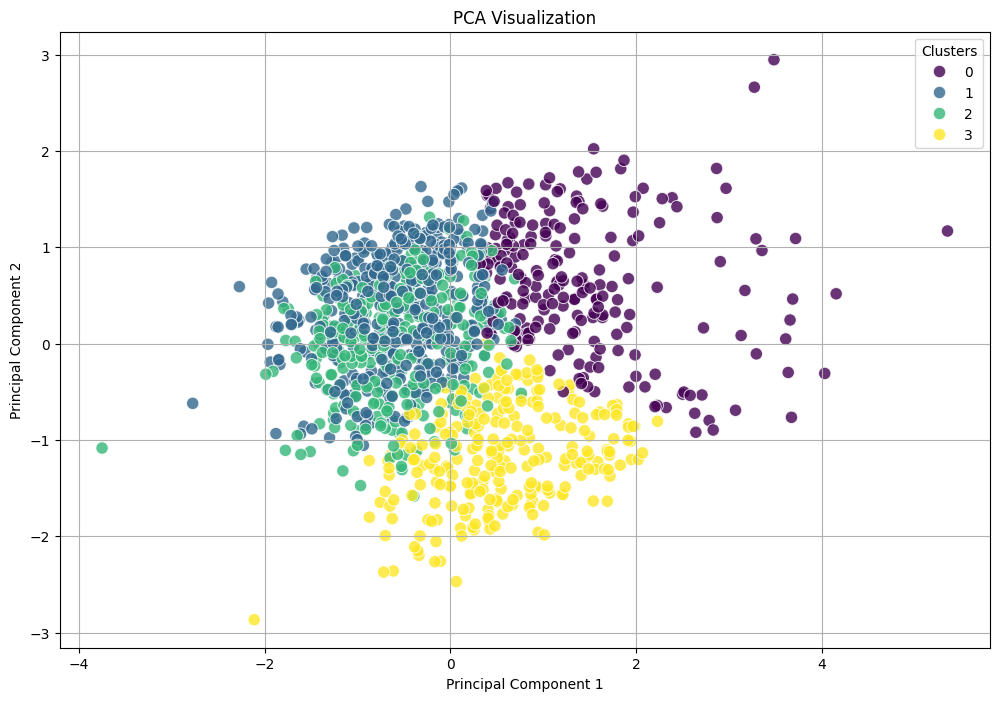

In [51]:
plt.figure(figsize=(12,8))
sns.scatterplot(
     x='pca1', y='pca2', hue='cluster', data=X,
    palette='viridis', s=80, alpha=0.8
)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Clusters')
plt.grid(True)
plt.show

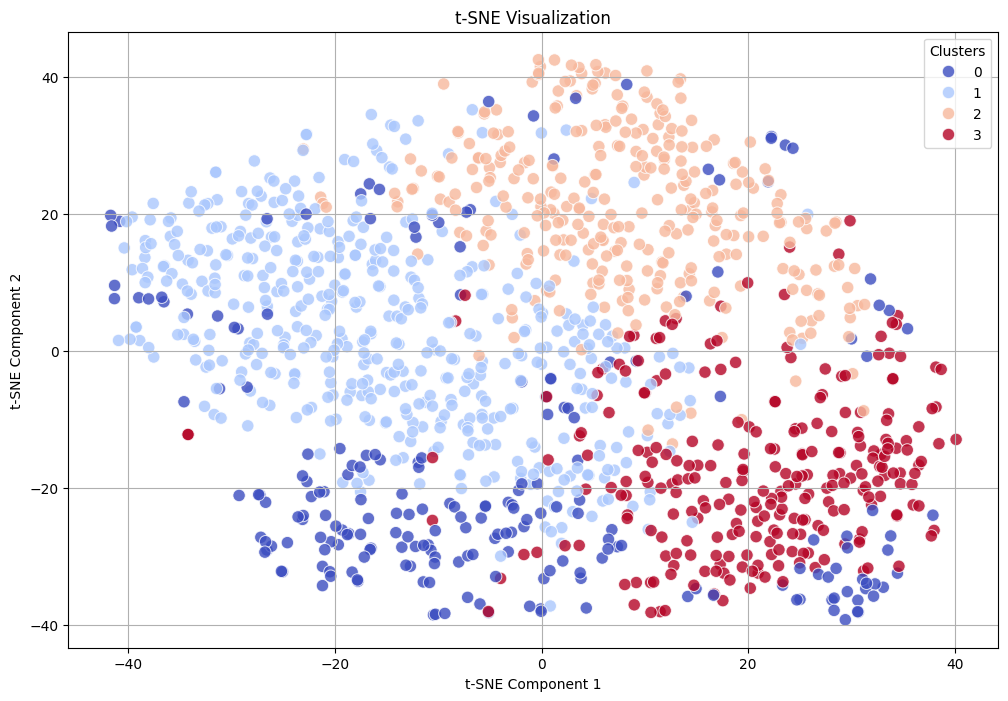

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(
     x='tsne1', y='tsne2', hue='cluster', data=X,
    palette='coolwarm', s=80, alpha=0.8
)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Clusters')
plt.grid(True)
plt.show()

import os
import glob
import warnings
warnings.filterwarnings("ignore")

import streamlit as st
import pandas as pd
import numpy as np
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error,
    accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
)

# ======================== PAGE CONFIG ========================
st.set_page_config(
    page_title="OpenLearn Capstone – Mental Health in Tech",
    layout="wide",
    page_icon="🧠"
)

# ======================== CONSTANT PATHS =====================
# --- For robust path handling, consider using paths relative to the script ---
# Example: SCRIPT_DIR = os.path.dirname(os.path.abspath(__file__))
# ROOT = os.path.join(SCRIPT_DIR, "..") # If app.py is in a 'src' folder
ROOT = "E:/codes/MachineLearning/Capstone_Project" # Your original path
DATA_PATH = os.path.join(ROOT, "Notebooks", "cleaned_dataset.csv")
MODEL_DIR = os.path.join(ROOT, "model_pkl")
IMG_DIR   = os.path.join(ROOT, "images")

EDA_DIRS = {
    "Univariate":   os.path.join(IMG_DIR, "univariate"),
    "Bivariate":    os.path.join(IMG_DIR, "bivariate"),
    "Multivariate": os.path.join(IMG_DIR, "multivariate"),
}

SECTION_IMG_DIRS = {
    "Clustering":     os.path.join(IMG_DIR, "clustering"),
}

# ======================== LOADERS ===========================
@st.cache_resource(show_spinner="Loading data...")
def load_df(path: str):
    if not os.path.exists(path):
        return None, f"Dataset not found at: {path}"
    try:
        df = pd.read_csv(path)
        return df, None
    except Exception as e:
        return None, f"Failed to read CSV: {e}"

@st.cache_resource(show_spinner="Loading models...")
def load_model(path: str):
    if not os.path.exists(path):
        return None, f"Model not found at: {path}"
    try:
        mdl = joblib.load(path)
        return mdl, None
    except Exception as e:
        return None, f"Failed to load model: {e}"

def list_images(folder):
    if not os.path.exists(folder):
        return []
    files = sorted([f for f in glob.glob(os.path.join(folder, "*")) if f.lower().endswith((".png", ".jpg", ".jpeg"))])
    return files

# ======================== UTILITIES =========================
def show_image_gallery(folder, cols=2, caption_prefix=""):
    imgs = list_images(folder)
    if not imgs:
        st.info(f"No images found in: `{folder}`")
        return
    grid_cols = st.columns(cols)
    for i, path in enumerate(imgs):
        with grid_cols[i % cols]:
            st.image(path, use_container_width=True, caption=f"{caption_prefix}{os.path.basename(path)}")

def summarize_dataframe(df: pd.DataFrame):
    c1, c2, c3, c4 = st.columns(4)
    with c1: st.metric("Rows", f"{df.shape[0]:,}")
    with c2: st.metric("Columns", f"{df.shape[1]:,}")
    with c3: st.metric("Numeric Columns", f"{df.select_dtypes(include=[np.number]).shape[1]}")
    with c4: st.metric("Categorical Columns", f"{df.select_dtypes(exclude=[np.number]).shape[1]}")

def build_input_ui(df: pd.DataFrame, title="Enter features", help_text=""):
    st.subheader(title)
    if help_text:
        st.caption(help_text)

    # <<< CHANGED >>> Exclude common target columns from the input form
    target_cols = ['treatment', 'Age', 'cluster'] # Add any other targets
    feature_cols = [col for col in df.columns if col not in target_cols]
    
    num_cols = df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = [c for c in feature_cols if c not in num_cols]

    cols = st.columns(2)
    inputs = {}

    with cols[0]:
        st.markdown("##### Numeric Features")
        for col in num_cols:
            col_series = df[col].dropna()
            if col_series.empty:
                min_v, max_v, default = 0.0, 100.0, 50.0
            else:
                min_v, max_v = float(col_series.min()), float(col_series.max())
                default = float(np.nanmedian(col_series))
            if min_v == max_v: max_v = min_v + 1.0
            inputs[col] = st.slider(f"{col}", min_v, max_v, default)

    with cols[1]:
        st.markdown("##### Categorical Features")
        for col in cat_cols:
            opts = df[col].dropna().unique().tolist()
            if not len(opts): opts = [""]
            inputs[col] = st.selectbox(f"{col}", options=opts, index=0)

    # Return a single-row DataFrame with columns in the original order
    return pd.DataFrame([inputs])[df.drop(columns=target_cols, errors='ignore').columns]


def expander_metrics_block(title, kv_pairs):
    with st.expander(title, expanded=True):
        cols = st.columns(min(4, len(kv_pairs)))
        for i, (k, v) in enumerate(kv_pairs.items()):
            with cols[i % len(cols)]:
                st.metric(k, v)

def pretty_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False, ax=ax,
                xticklabels=labels, yticklabels=labels, cmap="Blues")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    st.pyplot(fig)

# ======================== LOAD DATA/MODELS ==================
df, df_err = load_df(DATA_PATH)
reg_model, reg_err = load_model(os.path.join(MODEL_DIR, "regressor.pkl"))
clf_model, clf_err = load_model(os.path.join(MODEL_DIR, "classifier.pkl"))
cluster_model, cluster_err = load_model(os.path.join(MODEL_DIR, "cluster.pkl"))

# ======================== SIDEBAR NAV =======================
st.sidebar.title("🧭 Navigation")
page = st.sidebar.radio(
    "Go to",
    ["🏠 Home", "🔎 EDA", "🌀 Clustering", "📈 Regression", "🧮 Classification"]
)

# ======================== PAGES ============================
def page_home():
    st.title("🧠 Mental Health in the Tech Workplace")
    st.write("**Cohort:** OpenLearn @ NIT Jalandhar • **Year:** 2025 • **Dataset:** OSMI 2014")
    st.divider()

    # <<< ADDED >>> A more engaging intro
    st.header("🎯 Project Goal")
    st.markdown("""
    This project analyzes the 2014 OSMI dataset to understand the landscape of mental health in the tech industry. We aim to answer key questions:
    - What factors influence an employee's willingness to seek treatment?
    - Can we predict whether an individual will seek help based on their work environment and demographics?
    - Can we identify distinct groups (personas) of employees based on their attitudes and experiences with mental health?
    """)

    st.header("📊 Dataset Snapshot")
    if df_err:
        st.error(f"**Failed to load dataset:** {df_err}")
    else:
        summarize_dataframe(df)
        st.dataframe(df.head(10), use_container_width=True)

    st.header("🔑 Key Findings")
    st.info("""
    - **Classification:** Workplace culture, particularly employer-provided benefits and discussion of mental health, are strong predictors of whether an employee will seek treatment.
    - **Clustering:** Employees can be grouped into distinct personas, from the 'Well-Supported & Proactive' to the 'Unsupported & At-Risk'.
    """)

def page_eda():
    st.title("🔎 Exploratory Data Analysis")
    st.write("This section provides a visual exploration of the dataset.")
    tabs = st.tabs(["Univariate", "Bivariate", "Multivariate", "Interactive (Live)"])
    
    with tabs[0]:
        st.subheader("Univariate Analysis (Saved PNGs)")
        show_image_gallery(EDA_DIRS["Univariate"], cols=2, caption_prefix="Univariate • ")
    with tabs[1]:
        st.subheader("Bivariate Analysis (Saved PNGs)")
        show_image_gallery(EDA_DIRS["Bivariate"], cols=2, caption_prefix="Bivariate • ")
    with tabs[2]:
        st.subheader("Multivariate Analysis (Saved PNGs)")
        show_image_gallery(EDA_DIRS["Multivariate"], cols=2, caption_prefix="Multivariate • ")
    
    with tabs[3]:
        st.subheader("Interactive Data Exploration")
        if df_err:
            st.warning("Interactive EDA disabled: dataset not loaded.")
            return
        
        summarize_dataframe(df)
        st.markdown("---")
        num_cols = df.select_dtypes(include=np.number).columns.tolist()
        cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

        c1, c2 = st.columns(2)
        with c1:
            st.markdown("#### Numeric Distribution")
            if num_cols:
                num_col_select = st.selectbox("Choose a numeric column:", num_cols, key="dist_col")
                fig, ax = plt.subplots()
                sns.histplot(df[num_col_select].dropna(), kde=True, bins=30, ax=ax)
                st.pyplot(fig)
            else:
                st.info("No numeric columns found.")
        
        # <<< ADDED >>> Interactive Boxplot for Numeric vs. Categorical
        with c2:
            st.markdown("#### Numeric vs. Categorical")
            if num_cols and cat_cols:
                num_col_box = st.selectbox("Numeric (Y-axis):", num_cols, key="box_num")
                cat_col_box = st.selectbox("Categorical (X-axis):", cat_cols, key="box_cat")
                fig, ax = plt.subplots()
                sns.boxplot(data=df, x=cat_col_box, y=num_col_box, ax=ax)
                plt.xticks(rotation=45, ha='right')
                st.pyplot(fig)
            else:
                st.info("Requires at least one numeric and one categorical column.")

def page_clustering():
    st.title("🌀 Clustering & Persona Analysis")
    st.write("""
    **Goal:** Segment respondents into meaningful groups (personas) using K-Means Clustering.
    These personas help us understand the different types of experiences employees have regarding mental health in the workplace.
    """)
    st.info("The plots below (like t-SNE) help visualize the discovered clusters in 2D space.")
    
    show_image_gallery(SECTION_IMG_DIRS["Clustering"], cols=2, caption_prefix="Cluster Viz • ")
    st.markdown("---")

    # <<< CHANGED >>> Replaced markdown with detailed expanders for each new persona
    st.header("Cluster Personas Explained")
    st.write("Based on the clustering analysis, we identified four distinct personas:")

    with st.expander("👤 Cluster 0 – “Keepin’ it to themselves”", expanded=True):
        st.markdown("""
        These folks… they ain’t talkin’. Even if the company had a mental health program, they probably won’t use it. Not because they don’t care, but maybe they don’t wanna be “that person” in the office. You know, more of the smile and keep it movin’ type.
        """)

    with st.expander("👤 Cluster 1 – “Kinda open, kinda not”"):
        st.markdown("""
        This group is in that grey area. They’ll chat about mental health if the vibe feels right, but they ain’t out here campaigning for it. It’s like, if you bring it up, they’ll share a bit, but otherwise they just focus on work.
        """)

    with st.expander("👤 Cluster 2 – “The quiet strugglers”"):
        st.markdown("""
        Here we’ve got the people who’ve had their own battles before, but they don’t talk about it much. It’s not that they don’t care — they just… deal with it on their own. A lot of them feel like there’s not enough help from their workplace either.
        """)
        
    with st.expander("👤 Cluster 3 – “The loud-and-proud supporters”"):
        st.markdown("""
        These are the ones putting up posters for Mental Health Day and telling everyone about therapy apps. If they see someone struggling, they’ll actually stop and talk to ‘em. They want more resources, more support, and they’re not shy about saying it.
        """)

    # <<< CHANGED >>> Removed the interactive prediction section for clustering
    st.divider()
    st.info("ℹ️ Interactive prediction for clustering has been removed to focus on the analysis of the defined personas.")


def run_model_evaluation(model, X, y, model_type='classification'):
    """Helper to run and display model evaluation metrics."""
    try:
        y_hat = model.predict(X)
        
        if

In [41]:
import joblib
joblib.dump(cluster,'cluster.pkl')

['cluster.pkl']